# Image Binarization/ Thresholding - Assingment 2
### Kavishka Gamage - 17000475

## Content

1. Global Thresholding
2. Adaptive Thresholding
3. Otsu Method

## Import modulus

In [5]:
import cv2 as cv
print( cv.__version__ )
import numpy as np
from matplotlib import pyplot as plt

4.5.3


### Load images

In [7]:
img1 = cv.imread('imgs/noisy_leaf.jpg',0)
img2 = cv.imread('imgs/panda.jpg',0)
img3 = cv.imread('imgs/panda2.jpg',0)

## 1. Global Thresholding

In Glbal thresholding we arbitary select threshold value T

In [16]:
# Experiment with different THRESHOLD_TYPES
# 127 -
# 255 - Max value
def global_threshold(img):
    ret,thresh1 = cv.threshold(img,127,255,cv2.THRESH_BINARY)
    ret,thresh2 = cv.threshold(img,127,255,cv2.THRESH_BINARY_INV)
    ret,thresh3 = cv.threshold(img,127,255,cv2.THRESH_TRUNC)
    ret,thresh4 = cv.threshold(img,127,255,cv2.THRESH_TOZERO)
    ret,thresh5 = cv.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

    titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
    images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
    for i in range(6):
        plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

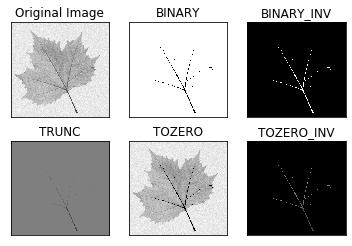

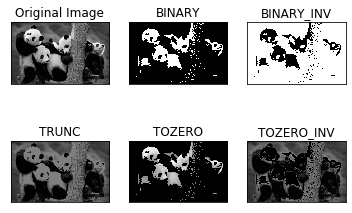

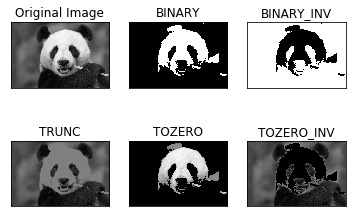

In [15]:
global_thresholding(img1)
global_thresholding(img2)
global_thresholding(img3)

## 2. Adaptive Thresholding

Uneven illumination factors can affect global thresholding (different ighting conditions in different regions). Adaptive thresholding can be used as a solution. Here we split image into squares/regions and check whether variance of each square exceed 100. If it exceed that value that particular square need to threshold seperatly. Algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image

### Adaptive thresholding  calculate as mean of block size vs Adaptive thresholding  calculate as weighted sum of block size

In [59]:
def adaptive_threshold(img):
    ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

    thresh2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
    thresh3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
    titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    images = [img, thresh1, thresh2, thresh3]
    plt.subplots(figsize=(7, 7))
    for i in range(4):
        plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

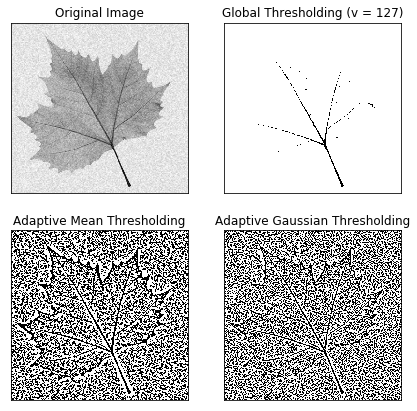

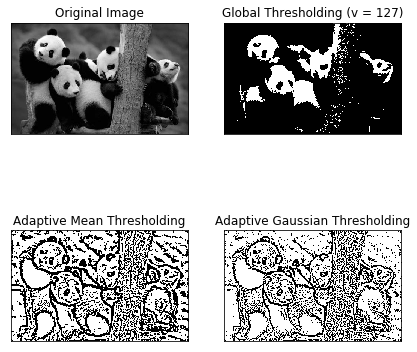

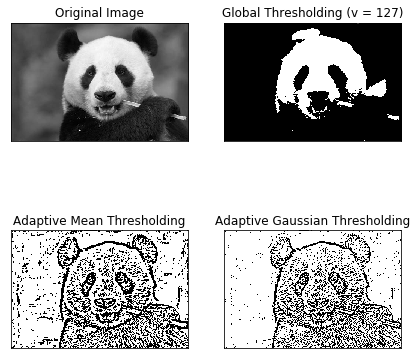

In [60]:
adaptive_threshold(img1)
adaptive_threshold(img2)
adaptive_threshold(img3)

## 3. Otsu Method

Otsu Binarization technique can be idealy  apply to images that is bimodal which is images we can see two distinct distribution in piel histogram. What Otsu method do is it finds the minimum point that we can seperate these two distribution. It will automatically gives optimal threshold value.



### Image Intensity Histogram

In [19]:
def plot_intensity_hist(img):
    plt.subplot(2,1,1), plt.imshow(img,cmap = 'gray')
    plt.title('Original Noisy Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,1,2), plt.hist(img.ravel(), 256)
    plt.title('Histogram'), plt.xticks([]), plt.yticks([])

    plt.show()   

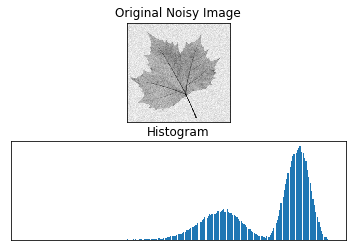

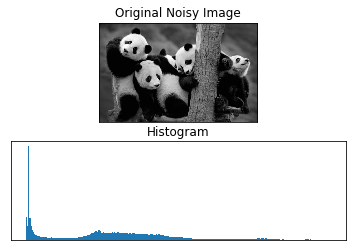

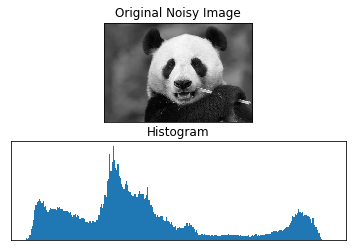

In [20]:
plot_intensity_hist(img1) # bimodal image
plot_intensity_hist(img2)
plot_intensity_hist(img3)

### Implementation of Otsu method

source - https://www.meccanismocomplesso.org/en/opencv-python-the-otsus-binarization-for-thresholding/

In [26]:

def otsu_1(img):

   #blur = cv2.GaussianBlur(img,(5,5),0)  # to reduce image noise

   # find normalized_histogram, and its cumulative distribution functio
   hist = cv2.calcHist([img],[0],None,[256],[0,256])
   hist_norm = hist.ravel()/hist.max()
   Q = hist_norm.cumsum()
   bins = np.arange(256)
   fn_min = np.inf
   thresh = -1
   for i in range(1,256):
      p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
      q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
      if q1 == 0:
         q1 = 0.00000001
      if q2 == 0:
         q2 = 0.00000001
      b1,b2 = np.hsplit(bins,[i]) # weights
      # finding means and variances
      m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
      v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
      # calculates the minimization function
      fn = v1*q1 + v2*q2
      if fn < fn_min:
         fn_min = fn
         thresh = i
   # find otsu's threshold value with OpenCV function
   ret, otsu = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
   print("Threshold otsu implementation 1 - ",thresh,"Otsu OpenCV implementation - ",ret)

In [27]:
otsu_1(img1)
otsu_1(img2)
otsu_1(img3)

Threshold otsu implementation 1 -  204 Otsu OpenCV implementation -  202.0
Threshold otsu implementation 1 -  87 Otsu OpenCV implementation -  86.0
Threshold otsu implementation 1 -  140 Otsu OpenCV implementation -  138.0


### After using Gaussian kernel to remove noise

In [54]:
def final_comparision(img):
    
    ret1,thresh1 = cv.threshold(img, 127, 255,cv.THRESH_BINARY )
    

    thresh2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
    ret3,thresh3 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
   

    # plot all the images and their histograms
    images = [img, 0, thresh1,img, 0, thresh2,img, 0, thresh3]#blur, 0, thresh4]
    titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
            'Orginal Noisy Image','Histogram','Adaptive thresholding- Mean',
            'Original Noisy Image','Histogram',"Otsu's Thresholding"]
          
    plt.subplots(figsize=(10, 10))
    for i in range(3):
        plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
        plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
        plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
        plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
        plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
        plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
        
        
    plt.show()  

## Compare result of different image thresholding techniques

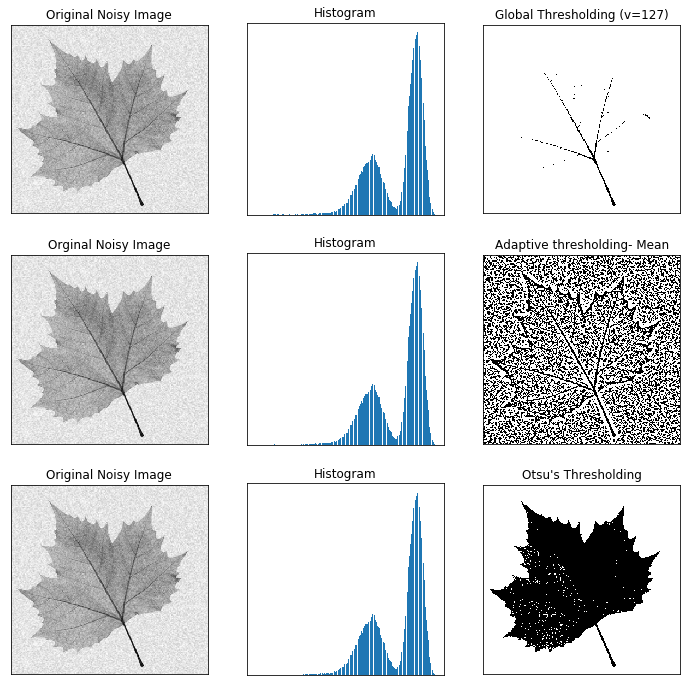

In [53]:
final_comparision(img1)

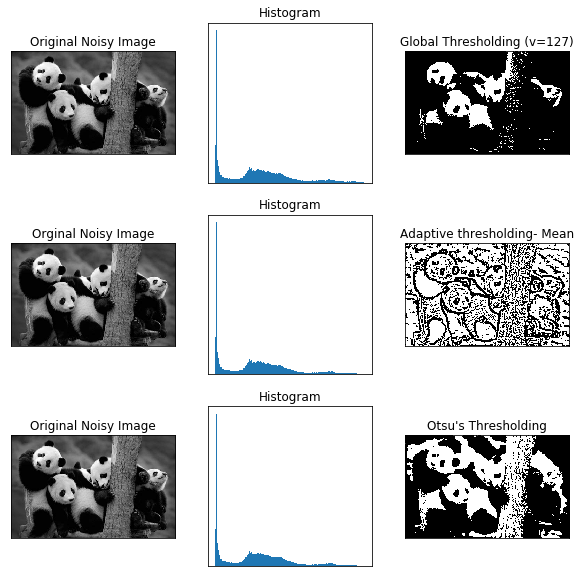

In [61]:
final_comparision(img2)

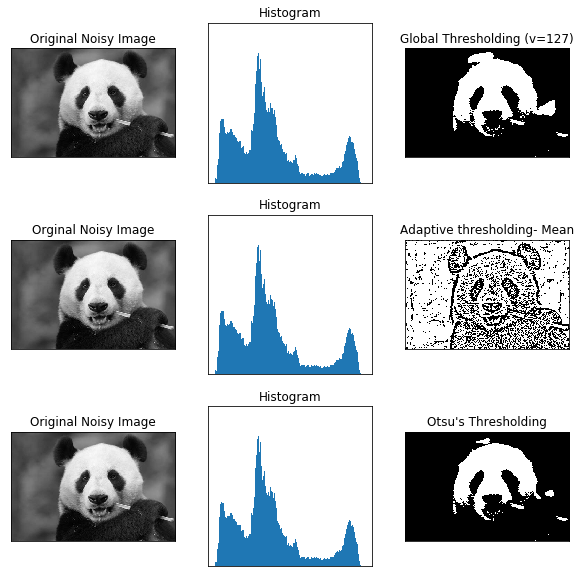

In [62]:
final_comparision(img3)

## Discussion

Global thresholding, adaptive thresholding and otsu thresholding gave very different output images. In given input images Otsu thresholding thechnuqe identify foreground and background better than other two techniques. Here I have used one images which clearly has two distinct distribution of intensity While other images not. Otsu method works well in bimodal images. 